# Netfilx Data Visualization

## Loading the dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from termcolor import colored

In [2]:
df = pd.read_csv("../datasets/netflix_titles.csv")
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


In [3]:
print(colored("There are {} rows and {} columns in the dataset.".format(df.shape[0],df.shape[1]),attrs=['bold']))

There are 7787 rows and 12 columns in the dataset.


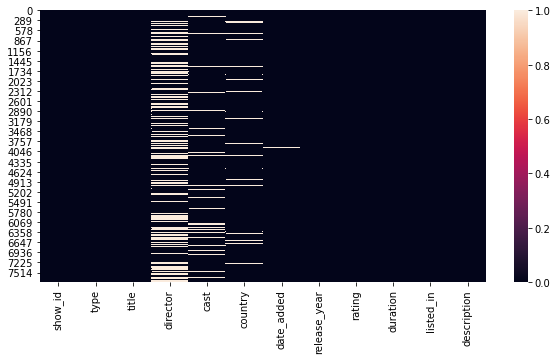

director's null rate : 30.68%
cast's null rate : 9.22%
country's null rate : 6.51%
date_added's null rate : 0.13%
rating's null rate : 0.09%


In [4]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull())
plt.show()

for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100
    if null_rate > 0:
        print("{}'s null rate : {}%".format(i,round(null_rate,2)))

## Handling missing values

In [5]:
# drop director since they have high volume of missing values
df.drop(['director'],axis=1, inplace = True)
df.columns

Index(['show_id', 'type', 'title', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
df.dropna(inplace = True)
print(colored("There are {} rows and {} columns after handling the missing records in the datasets.".format(df.shape[0],df.shape[1]),attrs=['bold']))

There are 6643 rows and 11 columns after handling the missing records in the datasets.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6643 entries, 0 to 7785
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6643 non-null   object
 1   type          6643 non-null   object
 2   title         6643 non-null   object
 3   cast          6643 non-null   object
 4   country       6643 non-null   object
 5   date_added    6643 non-null   object
 6   release_year  6643 non-null   int64 
 7   rating        6643 non-null   object
 8   duration      6643 non-null   object
 9   listed_in     6643 non-null   object
 10  description   6643 non-null   object
dtypes: int64(1), object(10)
memory usage: 622.8+ KB


In [8]:
df['date_added'] = pd.to_datetime(df['date_added'])

df['month_added'] = df['date_added'].dt.month
df['month_name_added'] = df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

df.drop('date_added',axis=1,inplace=True)

In [9]:
df.head(3)

,show_id,type,title,cast,country,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8,August,2020
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12,December,2016
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12,December,2018


## Content type on Netlix

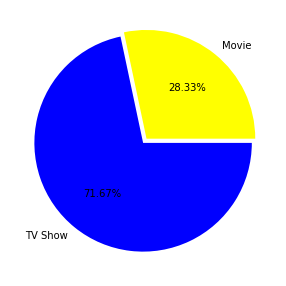

In [10]:
plt.figure(figsize=(10,5))
plt.pie(df['type'].value_counts().sort_values(),
        labels=df['type'].value_counts().index,explode=[0.05,0],
       autopct='%1.2f%%',
       colors=['Yellow','Blue'])
plt.show()

In [11]:
from collections import Counter
country_data = df['country']
country_count = pd.Series(dict(
    Counter(','.join(country_data).replace(
        ' ,',',').replace(
        ', ',',').split(',')))).sort_values(ascending=False)

In [12]:
top20country = country_count.head(20)

c:\users\jdhyeok\desktop\basketball\data-science-starter\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


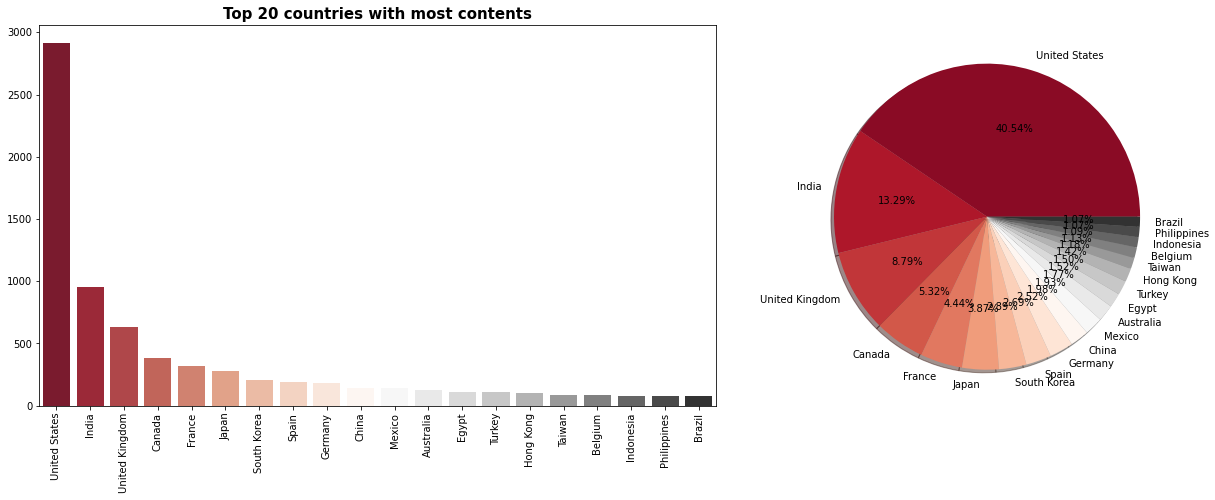

In [13]:
from matplotlib import gridspec

fig = plt.figure(figsize=(20, 7))
gs = gridspec.GridSpec(nrows=1, ncols=2, height_ratios=[6], width_ratios=[10, 5])

ax = plt.subplot(gs[0])
sns.barplot(top20country.index, top20country, ax=ax, palette="RdGy")
ax.set_xticklabels(top20country.index, rotation='90')
ax.set_title('Top 20 countries with most contents', fontsize=15, fontweight='bold')

ax2 = plt.subplot(gs[1])
ax2.pie(top20country, labels=top20country.index, shadow=True, startangle=0, colors=sns.color_palette("RdGy", n_colors=20),
       autopct='%1.2f%%')
ax2.axis('equal') 

plt.show()

In [14]:
df_tv = df[df["type"] == "TV Show"]
df_movies = df[df["type"] == "Movie"]

In [15]:
df_content = df['year_added'].value_counts().reset_index().rename(columns = {'year_added' : 'count', 'index' : 'year_added'}).sort_values('year_added')
df_content['percent'] = df_content['count'].apply(lambda x : 100*x/sum(df_content['count']))

df_tv1 = df_tv['year_added'].value_counts().reset_index().rename(columns = {'year_added': 'count', 'index': 'year_added'}).sort_values('year_added')
df_tv1['percent'] = df_tv1['count'].apply(lambda x : 100*x/sum(df_tv1['count']))

df_movies1 = df_movies['year_added'].value_counts().reset_index().rename(columns = {'year_added': 'count', 'index': 'year_added'}).sort_values('year_added')
df_movies1['percent'] = df_movies1['count'].apply(lambda x : 100*x/sum(df_movies1['count']))

t1 = go.Scatter(x=df_movies1['year_added'], y = df_movies1['count'],name='Movies',marker=dict(color='red'))
t2 = go.Scatter(x=df_tv1['year_added'], y = df_tv1['count'],name='TV Shows',marker=dict(color='blue'))
t3 = go.Scatter(x=df_content['year_added'], y = df_content['count'],name='Total Contents',marker=dict(color='brown'))

data = [t1,t2,t3]

layout = go.Layout(title='Content added over the years', legend=dict(x=0.1, y=1.1, orientation='h'))
fig = go.Figure(data, layout=layout)
fig.show()

## Genre Relationship

In [17]:
from sklearn.preprocessing import MultiLabelBinarizer

def relation_heatmap(df, title):
    df['genre'] = df['listed_in'].apply(lambda x : x.replace(' ,',',').replace(', ',',').split(','))
    Types = []
    for i in df['genre']: Types += i
    Types = set(Types)
    print("Threre are {} types in the Netfilx {} Dataset".format(len(Types),title))
    test = df['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(10, 7))
    pl = sns.heatmap(corr, mask= mask, cmap="coolwarm",vmax=.5,vmin=-.5,center=0,square=True, linewidths=.7,cbar_kws={"shrink":0.6})
    plt.show()

<ipython-input-17-5dd8ec3f6efa>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-17-5dd8ec3f6efa>:13: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



Threre are 20 types in the Netfilx Movie Dataset


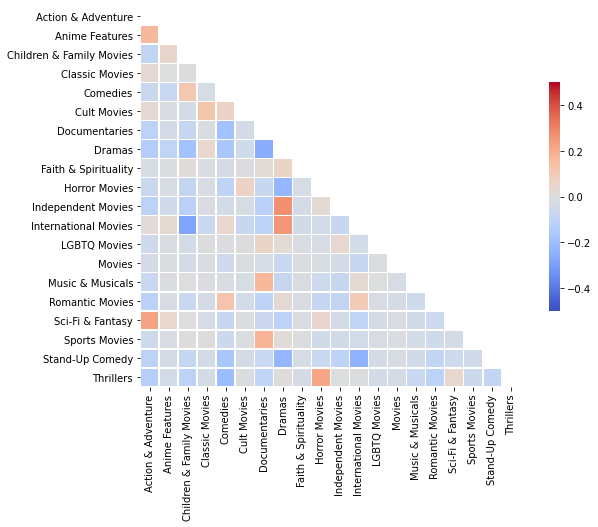

In [18]:
relation_heatmap(df_movies, 'Movie')

<ipython-input-17-5dd8ec3f6efa>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-17-5dd8ec3f6efa>:13: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



Threre are 22 types in the Netfilx TV Shows Dataset


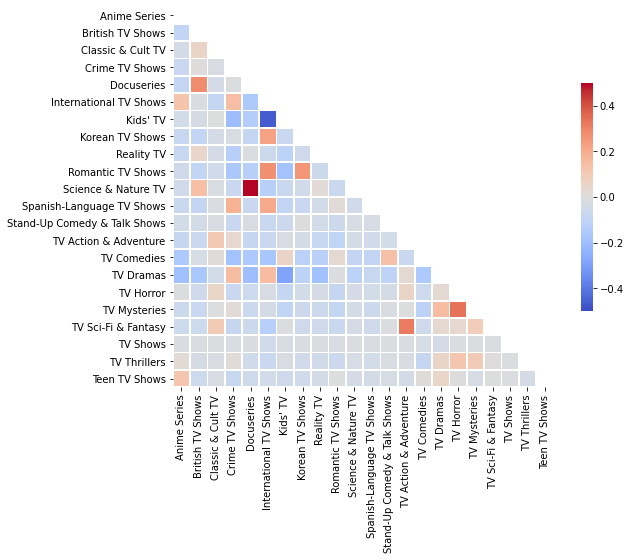

In [19]:
relation_heatmap(df_tv, 'TV Shows')

## Rating distribution

In [25]:
rating_order_movie =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
rating_order_tv =  [ 'TV-Y', 'TV-G', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'TV-14', 'R', 'TV-MA']

In [26]:
movie_rating = df_movies['rating'].value_counts()[rating_order_movie]
tv_rating = df_tv['rating'].value_counts()[rating_order_tv].fillna(0)

In [27]:
def rating_barplot(data, title, height, h_lim=None):
    fig, ax = plt.subplots(1,1, figsize=(15, 7))
    if h_lim :
        ax.set_ylim(0, h_lim)
    ax.bar(data.index, data,  color="#d0d0d0", width=0.6, edgecolor='black')

    color =  ['green',  'blue',  'orange',  'red']
    span_range = [[0, 2], [3,  6], [7, 8], [9, 11]]

    for idx, sub_title in enumerate(['Little Kids', 'Older Kids', 'Teens', 'Mature']):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2 ,height),
                    xytext=(0,0), textcoords='offset points',
                    va="center", ha="center",
                    color="w", fontsize=16, fontweight='bold',
                    bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax.axvspan(span_range[idx][0]-0.4,span_range[idx][1]+0.4,  color=color[idx], alpha=0.1)

    ax.set_title(f'Distribution of {title} Rating', fontsize=20, fontweight='bold', position=(0.5, 1.0+0.03))
    plt.show()

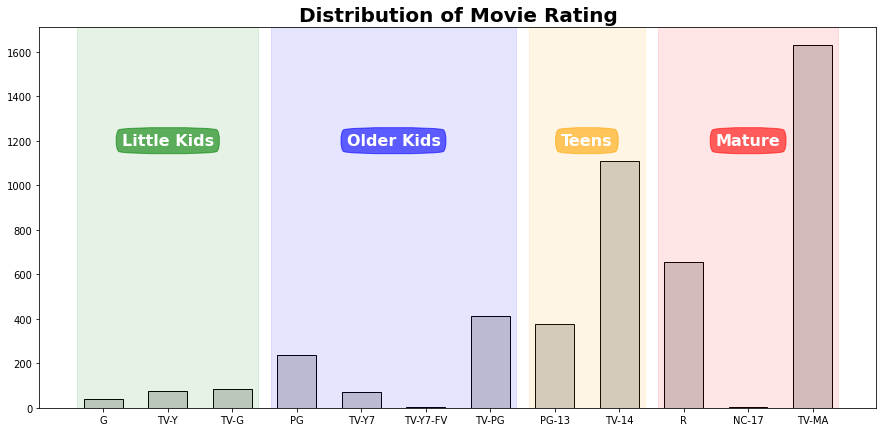

In [28]:
rating_barplot(movie_rating,'Movie', 1200)

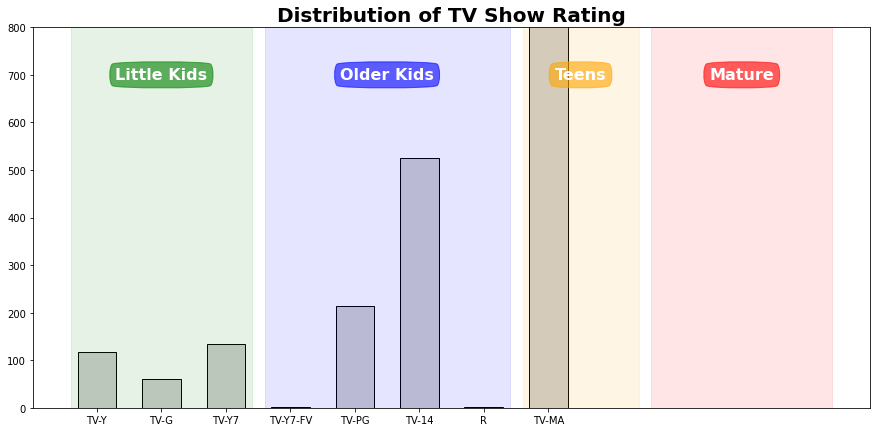

In [29]:
rating_barplot(tv_rating,'TV Show' , 700, 800)

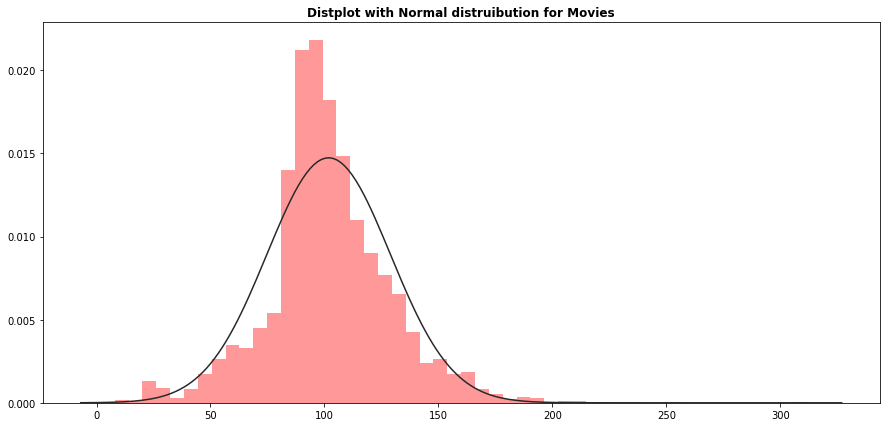

In [31]:
from scipy.stats import norm

plt.figure(figsize=(15,7))
sns.distplot(df_movies['duration'].str.extract('(\d+)'),fit=norm,kde=False,color=['red'])
plt.title('Distplot with Normal distruibution for Movies', fontweight='bold')
plt.show()

c:\users\jdhyeok\desktop\basketball\data-science-starter\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



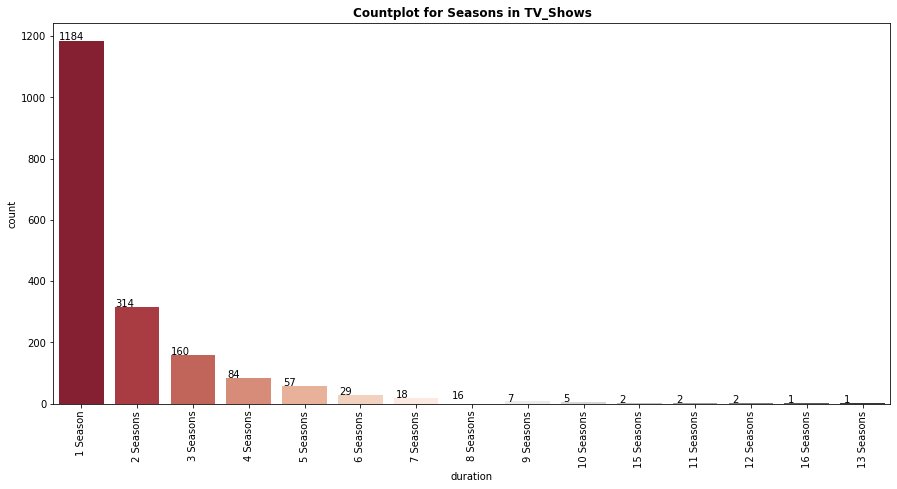

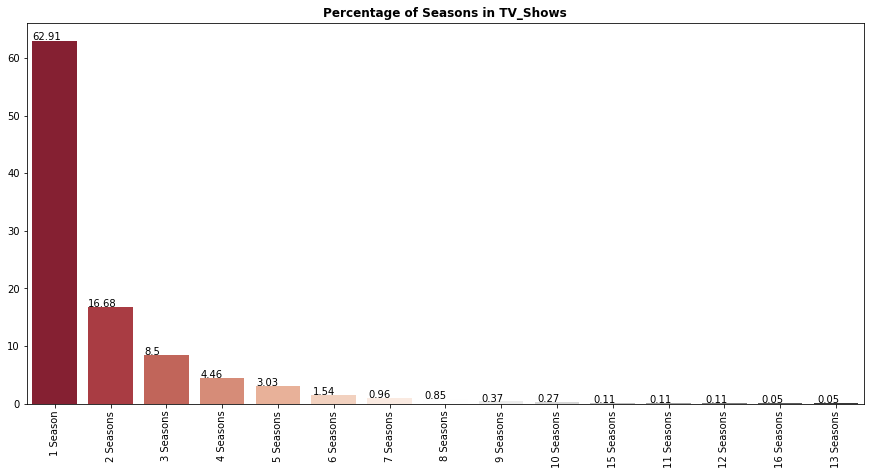

In [36]:
plt.figure(figsize=(15,7))
ax = sns.countplot(df_tv['duration'],order = df_tv['duration'].value_counts().index,palette="RdGy")
plt.title('Countplot for Seasons in TV_Shows',fontweight="bold")
plt.xticks(rotation=90)
for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, (p.get_height() * 1.005)))
                
plt.figure(figsize=(15,7))
ax = sns.barplot(x=((df_tv['duration'].value_counts()/df_tv.shape[0])*100).index, y = round(((df_tv['duration'].value_counts()/df_tv.shape[0])*100),2).values,palette='RdGy')
plt.title('Percentage of Seasons in TV_Shows', fontweight='bold')
plt.xticks(rotation=90)
for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, (p.get_height() * 1.005)))
plt.show()

## Top10 Genre in Movies and TV Shows

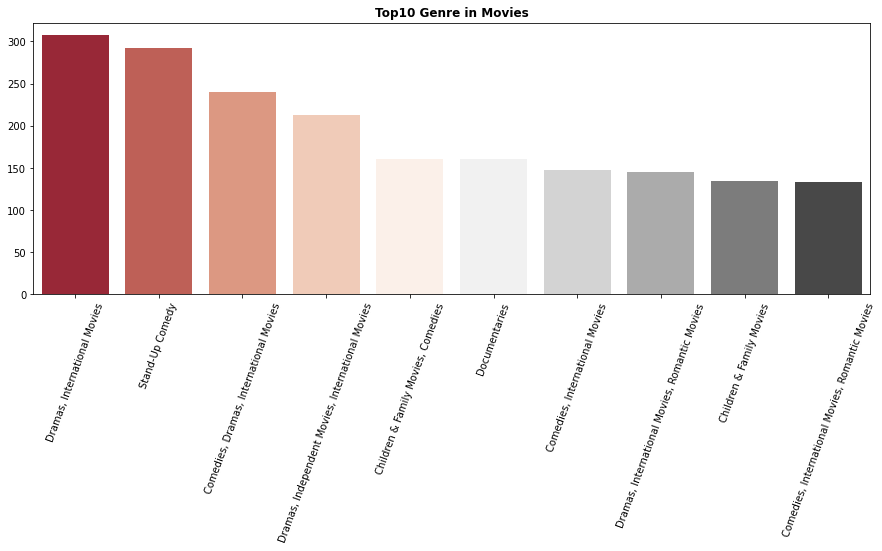

In [41]:
plt.figure(figsize=(15,5))
sns.barplot(x = df_movies['listed_in'].value_counts().head(10).index, y = df_movies['listed_in'].value_counts().head(10).values,palette='RdGy')
plt.xticks(rotation=70)
plt.title('Top10 Genre in Movies',fontweight='bold')
plt.show()

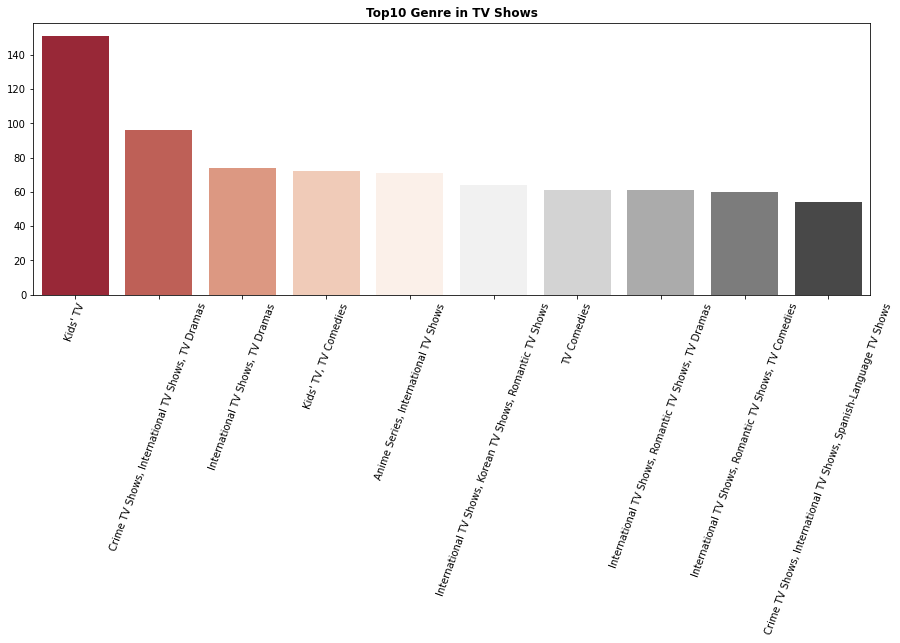

In [42]:
plt.figure(figsize=(15,5))
sns.barplot(x = df_tv['listed_in'].value_counts().head(10).index, y = df_tv['listed_in'].value_counts().head(10).values,palette='RdGy')
plt.xticks(rotation=70)
plt.title('Top10 Genre in TV Shows',fontweight='bold')
plt.show()

## Top20 artist present on Netfilx

In [43]:
df['cast_name'] = df['cast'].apply(lambda x : x.replace(' ,',',').replace(', ',',').split(','))
cast_count = []
for i in df['cast_name']:
    cast_count += i

cast_dict = dict((i, cast_count.count(i)) for i in cast_count)

df_cast_count = pd.DataFrame(cast_dict.values(),cast_dict.keys()).reset_index().sort_values(0,ascending=False).rename(columns={'index': 'cast_name',0:'count'}).iloc[1:21]

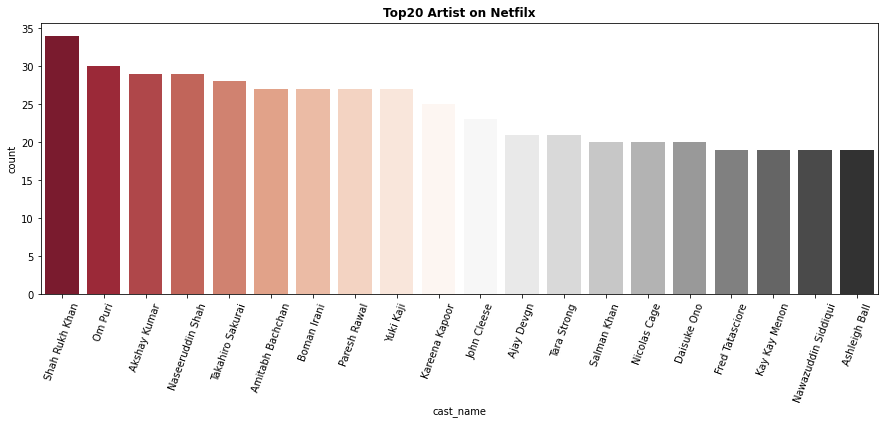

In [44]:
plt.figure(figsize=(15,5))
sns.barplot(x='cast_name',y='count',data=df_cast_count,palette='RdGy')
plt.title('Top20 Artist on Netfilx', fontweight='bold')
plt.xticks(rotation=70)
plt.show()

## Reference
https://www.kaggle.com/shikhnu/data-analysis-and-visualization-netflix-data